In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from data.gen import synth_generic_hazard
from utils.subgroup import fit_cox, in_region
from utils.functions import EPE
from utils.metrics import f1
from algs.ddgroup import ddgroup_job, c_ind_ddgroup_job, pl_ddgroup_job
from config.constants import core_sizes, rejection_thresholds

In [2]:
c1 = 0.4
slope = 10.
gap = 2.

def h(X):
    return slope * X - gap * (X > c1).astype(float)

In [3]:
B = np.array([[0.], [1.]])
n = 4000
X, Y = synth_generic_hazard(n, B, h, seed=42)

In [4]:
grid = np.arange(0., 1.1, 0.1)
epe_plot = np.full((len(grid), len(grid)), np.nan)

for i in range(len(grid)-1):
    for j in range(i + 1, len(grid)):
        R = np.array([[grid[i]], [grid[j]]])
        ind = in_region(X, R)
        beta = fit_cox(X[ind], Y[ind])
        epe_plot[i, j] = EPE(X[ind], Y[ind], beta)

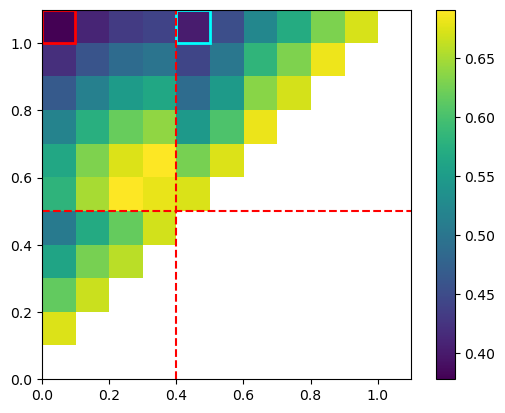

In [5]:
plt.imshow(epe_plot.T, origin='lower', extent=(0, 1.1, 0, 1.1))
plt.colorbar()

rect = patches.Rectangle((0.4, 1.0), 0.1, 0.1, 
                          linewidth=2, 
                          edgecolor='cyan', 
                          facecolor='none')  # 'none' means no fill

# Add the rectangle to the current axes
ax = plt.gca()  # Get current axes
ax.add_patch(rect)

i, j = np.unravel_index(np.nanargmin(epe_plot), epe_plot.shape)
rect = patches.Rectangle((grid[i], grid[j]), 0.1, 0.1, 
                          linewidth=2, 
                          edgecolor='red', 
                          facecolor='none')  # 'none' means no fill

# Add the rectangle to the current axes
ax = plt.gca()  # Get current axes
ax.add_patch(rect)

plt.axhline(c1+0.1, color='red', linestyle='--')
plt.axvline(c1, color='red', linestyle='--')

In [6]:
ddg_combined = []
ci_combined = []
pl_combined = []

n = 2000
for i in range(10):
    X, Y = synth_generic_hazard(n, B, h, seed=i)

    ddgroup_regions = ddgroup_job(X, X, Y, B, core_sizes, rejection_thresholds)
    ci_regions = c_ind_ddgroup_job(X, X, Y, B, core_sizes, rejection_thresholds)
    pl_regions = pl_ddgroup_job(X, X, Y, B, core_sizes, rejection_thresholds)

    ddgroup_f1s = [f1(ddg['R'], np.array([[c1], [1.]])) for ddg in ddgroup_regions]
    ci_f1s = [f1(cir['R'], np.array([[c1], [1.]])) for cir in ci_regions]
    pl_f1s = [f1(plr['R'], np.array([[c1], [1.]])) for plr in pl_regions]
    
    ddg_combined.append(max(ddgroup_f1s))
    ci_combined.append(max(ci_f1s))
    pl_combined.append(max(pl_f1s))

 22%|██▏       | 11/50 [00:00<00:00, 53.89it/s]/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:170: RuntimeWarning: overflow encountered in exp
  risk_set2 += np.exp(xw[k])
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:178: RuntimeWarning: overflow encountered in scalar add
  risk_set += risk_set2
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:28: ConvergenceWarning: Optimization did not converge: Maximum number of iterations has been exceeded.
  beta = CoxPHSurvivalAnalysis().fit(X, Y).coef_
 44%|████▍     | 22/50 [00:00<00:00, 72.34it/s]/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:170: RuntimeWarning: overflow encountered in exp
  risk_set2 += np.exp(xw[k])
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:178: RuntimeWarning: overflow encountered in scalar add
  risk_set += ris

Failed to fit Cox model for core size 0.05 and rejection threshold 0.26 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.27 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.28 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.29 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.3 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.31 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.32 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.33 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.34 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.35000000000000003 (C-index DDGroup).
Failed to fit Cox model for core size 0.05 and rejection threshold 0.36 (C-i

 46%|████▌     | 23/50 [00:00<00:00, 82.20it/s]/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:241: RuntimeWarning: invalid value encountered in divide
  a = risk_set_xx / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x 

Failed to fit Cox model for core size 0.1 and rejection threshold 0.27 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.28 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.29 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.3 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.31 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.32 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.33 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.34 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.35000000000000003 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.36 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.37 (C-index DDGrou

100%|██████████| 50/50 [00:04<00:00, 10.19it/s]
/Users/zach/repos/survival-subgroup-refactored/src/utils/metrics.py:90: RuntimeWarning: divide by zero encountered in scalar divide
  return 2. / ((1. / recall(R_hat, R)) + (1. / precision(R_hat, R)))
 26%|██▌       | 13/50 [00:00<00:00, 66.16it/s]/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:241: RuntimeWarning: invalid value encountered in divide
  a = risk_set_xx / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero en

Failed to fit Cox model for core size 0.1 and rejection threshold 0.17 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.18 (C-index DDGroup).


/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:28: ConvergenceWarning: Optimization did not converge: Maximum number of iterations has been exceeded.
  beta = CoxPHSurvivalAnalysis().fit(X, Y).coef_
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:81: RuntimeWarning: overflow encountered in divide
  y = np.cumsum(n_events / divisor)
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:28: ConvergenceWarning: Optimization did not converge: Maximum number of iterations has been exceeded.
  beta = CoxPHSurvivalAnalysis().fit(X, Y).coef_
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:81: RuntimeWarning: overflow encountered in divide
  y = np.cumsum(n_events / divisor)
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:28: ConvergenceWarning: Optimization did not converge: Maximum number of iterations has been exceeded.
  beta = CoxPHSurvivalAn

Failed to fit Cox model for core size 0.1 and rejection threshold 0.3 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.31 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.32 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.33 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.34 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.35000000000000003 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.36 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.37 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.38 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.39 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.4 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and reject

 88%|████████▊ | 44/50 [00:02<00:00, 39.14it/s]/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:241: RuntimeWarning: invalid value encountered in divide
  a = risk_set_xx / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x 

Failed to fit Cox model for core size 0.1 and rejection threshold 0.47000000000000003.
Failed to fit Cox model for core size 0.1 and rejection threshold 0.48.
Failed to fit Cox model for core size 0.1 and rejection threshold 0.49.


  2%|▏         | 1/50 [00:00<00:06,  7.79it/s]/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:241: RuntimeWarning: invalid value encountered in divide
  a = risk_set_xx / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x /

Failed to fit Cox model for core size 0.1 and rejection threshold 0.1 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.11 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.12 (C-index DDGroup).


/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:28: ConvergenceWarning: Optimization did not converge: Maximum number of iterations has been exceeded.
  beta = CoxPHSurvivalAnalysis().fit(X, Y).coef_
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:81: RuntimeWarning: overflow encountered in divide
  y = np.cumsum(n_events / divisor)
 62%|██████▏   | 31/50 [00:00<00:00, 81.35it/s]/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:28: ConvergenceWarning: Optimization did not converge: Maximum number of iterations has been exceeded.
  beta = CoxPHSurvivalAnalysis().fit(X, Y).coef_
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:81: RuntimeWarning: overflow encountered in divide
  y = np.cumsum(n_events / divisor)
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:28: ConvergenceWarning: Optimization did not converge: Maximum number of iterati

Failed to fit Cox model for core size 0.1 and rejection threshold 0.27 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.28 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.29 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.3 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.31 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.32 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.33 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.34 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.35000000000000003 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.36 (C-index DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.37 (C-index DDGrou

 46%|████▌     | 23/50 [00:00<00:00, 58.55it/s]/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:241: RuntimeWarning: invalid value encountered in divide
  a = risk_set_xx / risk_set
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:179: RuntimeWarning: divide by zero encountered in log
  loss -= (numerator - n_events * np.log(risk_set)) / n_samples
/Users/zach/anaconda3/envs/survival/lib/python3.11/site-packages/sksurv/linear_model/coxph.py:238: RuntimeWarning: invalid value encountered in divide
  z = risk_set_x 

Failed to fit Cox model for core size 0.1 and rejection threshold 0.32 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.33 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.34 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.35000000000000003 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.36 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.37 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.38 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.39 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.4 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.41000000000000003 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.42 (PL DDGroup).
Failed to fit Cox model for core siz

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:97: RuntimeWarning: invalid value encountered in log
  log_rs[k + 1] = log_rs[k] + np.log(S + (1 - Y['failure'][k]) * alpha0) - np.log(S + alpha0 - alphas[k])
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:97: RuntimeWarning: invalid value encountered in log
  log_rs[k + 1] = log_rs[k] + np.log(S + (1 - Y['failure'][k]) * alpha0) - np.log(S + alpha0 - alphas[k])
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:97: RuntimeWarning: invalid value encountered in log
  log_rs[k + 1] = log_rs[k] + np.log(S + (1 - Y['failure'][k]) * alpha0) - np.log(S + alpha0 - alphas[k])
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:97: RuntimeWarning: invalid value encountered in log
  log_rs[k + 1] = log_rs[k] + np.log(S + (1 - Y['failure'][k]) * alpha0) - np.log(S + alpha0 - alphas[k])
/Users/zach/repos/survival-subgroup-refactored/s

Failed to fit Cox model for core size 0.1 and rejection threshold 0.38 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.39 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.4 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.41000000000000003 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.42 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.43 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.44 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.45 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.46 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.47000000000000003 (PL DDGroup).
Failed to fit Cox model for core size 0.1 and rejection threshold 0.48 (PL DDGroup).
Failed to fit Cox model for core siz

  0%|          | 0/2000 [00:00<?, ?it/s]/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:97: RuntimeWarning: divide by zero encountered in log
  log_rs[k + 1] = log_rs[k] + np.log(S + (1 - Y['failure'][k]) * alpha0) - np.log(S + alpha0 - alphas[k])
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:112: RuntimeWarning: invalid value encountered in scalar subtract
  log_tail = min(logsumexp(logits[:ind+1]) - logsumexp(logits), logsumexp(logits[ind:]) - logsumexp(logits)) + np.log(2.)
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:97: RuntimeWarning: invalid value encountered in log
  log_rs[k + 1] = log_rs[k] + np.log(S + (1 - Y['failure'][k]) * alpha0) - np.log(S + alpha0 - alphas[k])
/Users/zach/repos/survival-subgroup-refactored/src/utils/subgroup.py:97: RuntimeWarning: invalid value encountered in log
  log_rs[k + 1] = log_rs[k] + np.log(S + (1 - Y['failure'][k]) * alpha0) - np.log(S + alpha0 - alphas[k])
/Users/zach/repos/

In [7]:
print("Baseline F1:", f1(B, np.array([[c1], [1.]])))
print("DDGroup F1:", np.mean(ddg_combined), "+/-", np.std(ddg_combined))
print("C-Index DDGroup F1:", np.mean(ci_combined), "+/-", np.std(ci_combined))
print("PL DDGroup F1:", np.mean(pl_combined), "+/-", np.std(pl_combined))

Baseline F1: 0.7499999999999999
DDGroup F1: 0.9411666041029234 +/- 0.006785588374021983
C-Index DDGroup F1: 0.7648538120023839 +/- 0.04456143600715202
PL DDGroup F1: 0.8146151983995958 +/- 0.09627601049195425
